## Análisis univariado

El análisis univariado es el primario y más básico. Consiste en analizar cada una de las variables estudiadas por separado, basándose exclusivamente en una a la vez. El motivo principal es entender comportamientos de variables individualmente, tanto el *output* como los *features* que utilizamos en el trabajo. Para ello, primero cargamos las liberías que utilizamos junto con el dataset armado en las secciones anteriores, que contiene la variable a predecir, es decir, el precio diario promedio de ethereum (la media entre apertura y clausura) y las variables independientes o predictoras. A su vez, creamos una clase que se utilizará para darle colores a los `prints` realizados en las líneas de código. 

Luego, la estructura exploratoria univariada se divide en la variable a predecir y los predictores utilizados en el trabajo. Debido a que se intenta seguir la lógica establecida en el enfoque de validación, es decir, extraer de la base un subconjunto para entrenamiento y otro para testeo, este análisis se realiza sobre los datos que se van a utilizar para ajustar el modelo. La razón radica en que los datos que son para testear la performance predictiva del estimador serán utilizados únicamente a modo de evaluación, entendiéndose a los mismos como datos "desconocidos" al momento de explorar la base. Por esto, una vez importado el dataset nos quedamos con los primeros años de la serie, que va desde el 8 de agosto de 2015 hasta el 31 de diciembre de 2020.  

In [1]:
# cargamos las librerías
import pandas as pd 
import numpy as np  
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from statsmodels.graphics.tsaplots import plot_pacf
from datetime import datetime, timedelta 
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl
import seaborn as sns
from seaborn import distplot
import scipy as scp
from statsmodels.tsa.stattools import grangercausalitytests
# muteamos algunos warnings esperables que no afectan los outputs de los códigos
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
# creamos la clase style para poner colores a los prints
class style():
    black = '\033[30m'
    red = '\033[31m'
    green = '\033[1;32m' # bold
    underline = '\033[4m'
    mark = '\33[44m'
    endc = '\033[0m'

In [3]:
# damos el estilo de ggplot y un tamaño de fuente a los gráficos 
mpl.style.use('ggplot') 
mpl.rcParams.update({'font.size': 15}) 

In [4]:
# importamos dataset
aux = 'https://drive.google.com/file/d/1GWaKdMRk4Fx9qGgBMioNeO3E7_I3bA8k/view?usp=sharing'
link ='https://drive.google.com/uc?id=' + aux.split('/')[-2]
df = pd.read_csv(link)
df = df.set_index('Date')

# subconjunto a utilizar: dataset de entrenamiento
start = df.index[0]
train = df[start:'2020-12-31']
train.head()

,Volume USDT_btc,cryptocurrency_adjusted,crypto_adjusted,bitcoin_adjusted,bitcoin price_adjusted,ethereum_adjusted,ethereum price_adjusted,stock market_adjusted,wall street_adjusted,interest rate_adjusted,...,y_lag4,y_lag5,y_lag6,y_lag7,unix_btc,open_btc,high_btc,low_btc,close_btc,Volume BTC_btc
Date,,,,,,,,,,,,,,,,,,,,,
2015-08-08,3.8010,0.0,0.48,1.74,0.27,0.0,0.0,1.45,8.32,16.38,...,2.150,1.825,1.310,1.645,1438992000,275.92,282.24,262.65,263.00,1032.69
2015-08-11,0.9435,0.0,0.88,1.89,0.49,0.0,0.0,2.61,9.92,19.74,...,1.825,1.310,1.645,1.520,1439251200,266.22,269.26,261.61,269.26,247.49
2015-08-12,2.5580,0.0,0.87,1.83,0.47,0.0,0.0,3.48,10.40,20.58,...,1.310,1.645,1.520,1.410,1439337600,269.26,275.63,263.33,265.41,682.19
2015-08-13,3.1890,0.0,0.87,1.95,0.35,0.0,0.0,2.61,10.40,18.48,...,1.645,1.520,1.410,1.515,1439424000,265.41,269.88,260.00,263.00,838.99
2015-08-14,2.1290,0.0,0.83,1.68,0.32,0.0,0.0,2.32,10.88,16.80,...,1.520,1.410,1.515,1.615,1439510400,263.00,265.00,255.00,265.00,556.23


In [6]:
# Información de la composición del dataset
print(f'{style.underline}Shape del dataset:{style.endc} {style.green}{train.shape}{style.endc}')
train.info()

Shape del dataset: (1963, 54)
<class 'pandas.core.frame.DataFrame'>
Index: 1963 entries, 2015-08-08 to 2020-12-31
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Volume USDT_btc              1963 non-null   float64
 1   cryptocurrency_adjusted      1963 non-null   float64
 2   crypto_adjusted              1963 non-null   float64
 3   bitcoin_adjusted             1963 non-null   float64
 4   bitcoin price_adjusted       1963 non-null   float64
 5   ethereum_adjusted            1963 non-null   float64
 6   ethereum price_adjusted      1963 non-null   float64
 7   stock market_adjusted        1963 non-null   float64
 8   wall street_adjusted         1963 non-null   float64
 9   interest rate_adjusted       1963 non-null   float64
 10  fed_adjusted                 1963 non-null   float64
 11  bankruptcy_adjusted          1963 non-null   float64
 12  china_adjusted               1963 no

Como se puede observar, el dataframe se compone de 54 columnas, 1963 filas y no cuenta con valores faltantes. Entre las variables utilizadas como predictoras, se encuentra la cotización de cierre y apertura del bitcoin, como su volumen diario de transacciones. Además, el dataset contiene frecuencia de las tendencias de google relacionadas al mercado de criptomonedas como las palabras *cryptocurrency, crypto, bitcoin, ethereum price, interest rate*, entre otros. Por otra parte, el target se compone de un conjunto de siete variables dependientes, las cuales representan el precio promedio de ethereum en distintos momentos futuros de tiempo.

A continuación, se construye una tabla con estadísticas descriptivas básicas con los inputs de *google trends*. Debido a que las frecuencias de este último se calculan en relación al valor máximo de toda la serie, se puede inferir que las variables que tienen promedios de búsqueda muy bajos podrían ser consideradas variables "de momento". Con este último término nos referimos a búsqueda de palabras que se ponen de moda en un lapso corto de tiempo, en relación al período completo. Por el contrario, variables que tienen un promedio de frecuencia de búsqueda muy altas, parecerían ser aquellas con una evolución temporal más regular. Esto lleva a plantear como hipótesis que las variables "de momento" podrían correlacionarse con los cambios abruptos del precio de las cotizaciones de ethereum. En cambio, palabras con promedio de búsqueda diario alto podrían tener menor correlación con grandes movimientos de nuestra variable a predecir. Los promedios, junto con otros estadísticos como los quintiles y desvíos estándar pueden observarse en la siguiente tabla, ordenada de mayor a menor según el promedio de la serie: 

In [35]:
# estadísticas descriptivas con los términos de búsqueda y tópicos de google trends
train.loc[:, ['adjusted' in i for i in train.columns]].describe().T.sort_values(by='mean', ascending=False).apply(lambda s: s.apply('{0:.5f}'.format))

,count,mean,std,min,25%,50%,75%,max
banking_adjusted,1963.00000,67.25898,14.27488,32.80000,56.98000,70.47000,77.20500,100.00000
investment_top_adjusted,1963.00000,42.40997,10.89634,18.00000,34.26000,44.10000,50.35000,69.00000
taxes_adjusted,1963.00000,42.05361,12.77281,12.25000,32.45000,41.80000,50.15000,84.28000
foreign_currency_adjusted,1963.00000,39.48777,11.46834,7.92000,32.94000,40.80000,46.92000,80.00000
interest rate_adjusted,1963.00000,38.89738,16.12168,8.82000,26.84000,35.91000,48.24000,97.00000
future_commodities_adjusted,1963.00000,33.80225,10.80731,13.02000,25.37000,33.62000,39.15500,96.03000
china_adjusted,1963.00000,31.98547,7.78720,14.43000,29.60000,32.37000,34.80000,100.00000
bankrup_top_adjusted,1963.00000,31.24008,13.91772,5.28000,20.16000,28.60000,42.65000,78.00000
war_adjusted,1963.00000,28.11535,10.47700,5.74000,22.00000,27.88000,34.30000,100.00000
bankruptcy_adjusted,1963.00000,21.75248,7.23612,5.06000,16.32000,21.09000,27.72000,47.00000


### Variable a predecir: precio diario promedio de ethereum 

En primer lugar, analizamos la serie del precio diario promedio de ethereum, nuestro target, que es el promedio entre el precio de apertura y cierre en un día. Como se dijo antes, la misma se compone de siete "instancias" que representan los precios futuros para los primeros siete días siguientes al presente, a saber: 

$$
y = y_{i+T} \text{ con } i = 0 \text{ y } T=1,2,...,7  
$$
Donde $i$ representa el tiempo actual y $T$ los días a predecir, el cual se compone de siete instancias o días futuros. 

Como se puede apreciar en la primera figura debajo, el precio de ethereum para el período de entrenamiento comienza los primeros años con valores cercanos a cero, para luego aumentar abruptamente, generando diferentes picos desde mediados de 2017 hasta mediados de 2019 aproximadamente. De hecho, el mayor valor de la serie se observa a principios del 2018. Luego, la cotización permanece estable alrededor de los 200 usdt hasta mediados de 2020, momento en el cual el precio promedio comienza a subir. Por supuesto, al estar contemplando la serie histórica del precio de ethereum tomamos los primeros momentos donde la criptomoneda "da sus primeros pasos". En este período de tiempo la misma no tiene la popularidad que gana a medidados del 2017, por lo que la baja trascendencia de ethereum en el mercado de monedas digitales se refleja en su precio casi nulo. 

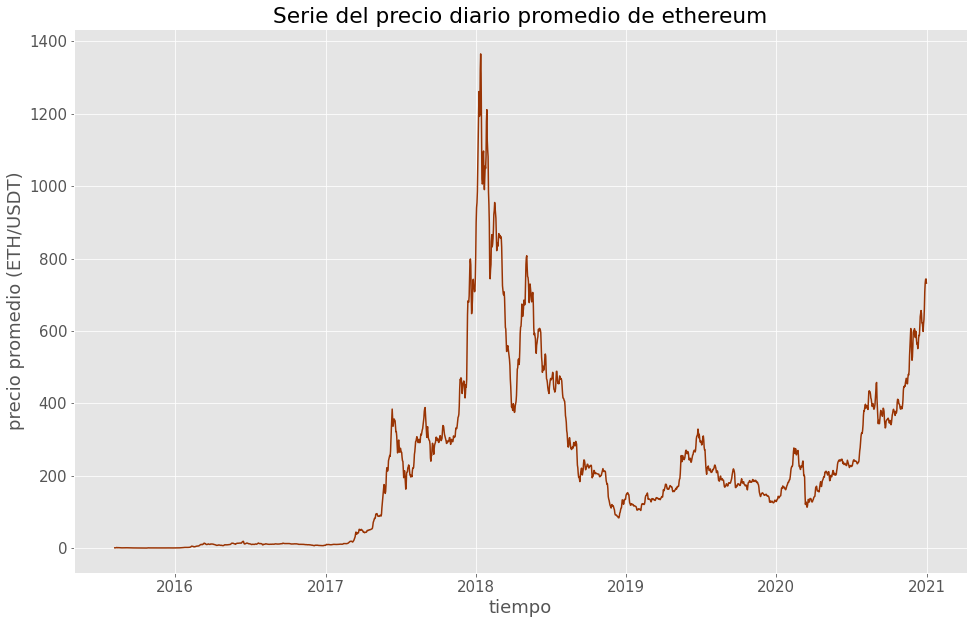

In [7]:
# graficamos la base ethereum completa
train.index = pd.to_datetime(train.index)
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(train['y_lag1'], color='#993404')
plt.ylabel("precio promedio (ETH/USDT)")
plt.xlabel("tiempo")
plt.title("Serie del precio diario promedio de ethereum");

Como suele ocurrir en series del mercado financiero, la cotización de ethereum es una serie no estacionaria. Tanto la media como la varianza son funciones del tiempo. Para poder verlo con mayor claridad aplicamos el filtro de Hodrick-Prescott a la serie para extraer el componente de tendencia y de ciclo de la misma. Los resultados se observan en los siguientes dos gráficos debajo:

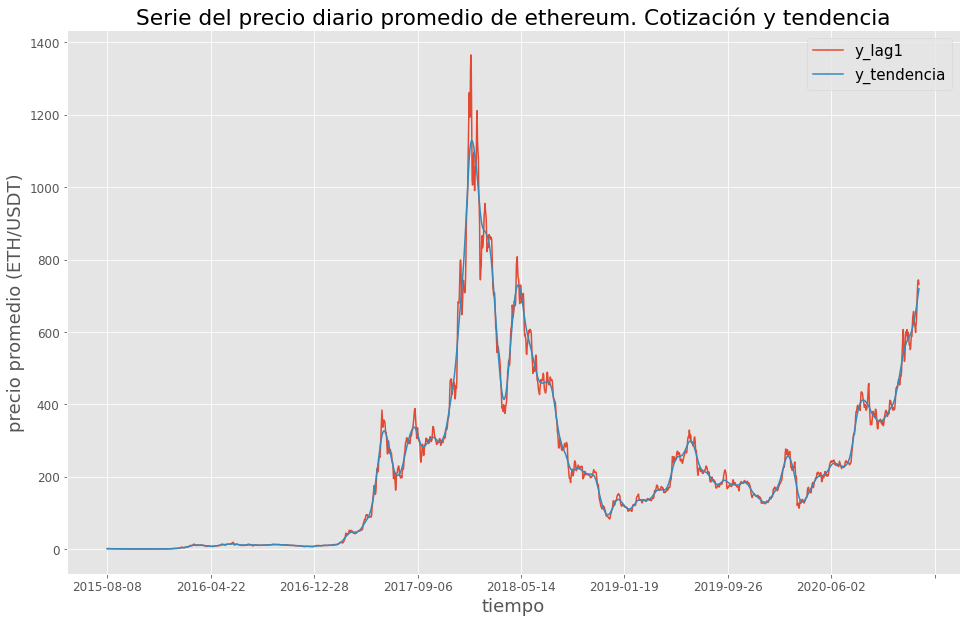

In [8]:
# Aplicando el filtro H-P para separar en tendencia y ciclo.
train_y_ciclo, train_y_tend = sm.tsa.filters.hpfilter(train['y_lag1'])
train.loc[:, 'y_tendencia'] = train_y_tend
# graficando la variacion del precio real con la tendencia.
train[['y_lag1', 'y_tendencia']].plot(figsize=(16,10), fontsize=12)
legend = plt.legend()
legend.prop.set_size(14)
plt.ylabel("precio promedio (ETH/USDT)")
plt.xlabel("tiempo")
plt.title("Serie del precio diario promedio de ethereum. Cotización y tendencia");

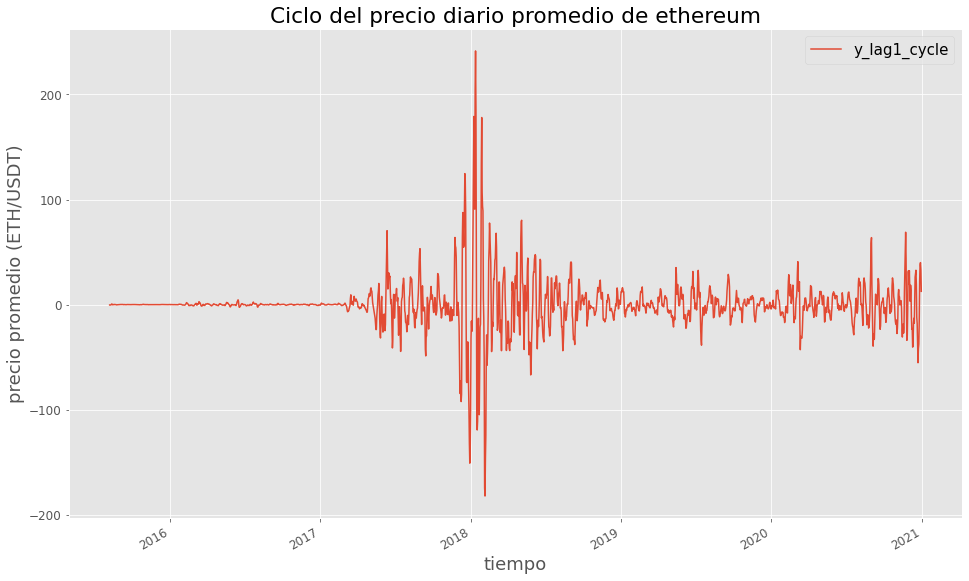

In [34]:
# graficando el ciclo
train_y_ciclo.plot(figsize=(16,10), fontsize=12)
legend = plt.legend()
legend.prop.set_size(14)
plt.ylabel("precio promedio (ETH/USDT)")
plt.xlabel("tiempo")
plt.title("Ciclo del precio diario promedio de ethereum");

Como se puede observar, ni la media ni la varianza en ambos gráficos son constantes. Esto trae un problema en los resultados que se puedan obtener del ejercicio, debido a que los hallazgos podrían ser de índole local más que global, es decir, los resultados no garantizan la identificación de patrones que puedan repetirse en períodos futuros lejanos. Sin embargo, en este trabajo se decide no optar por la estacionalización del target. Debido a que buscamos predecir precios de corto plazo, creemos que la estacionalización del target conllevaría un mayor margen de error en la predicción. De todas formas, para suavizar la serie y disminuir la irregularidad del precio de ethereum se opta por transformarla en logaritmo de base 10. El gráfico de abajo muestra el comportamiento de la variable transformada:

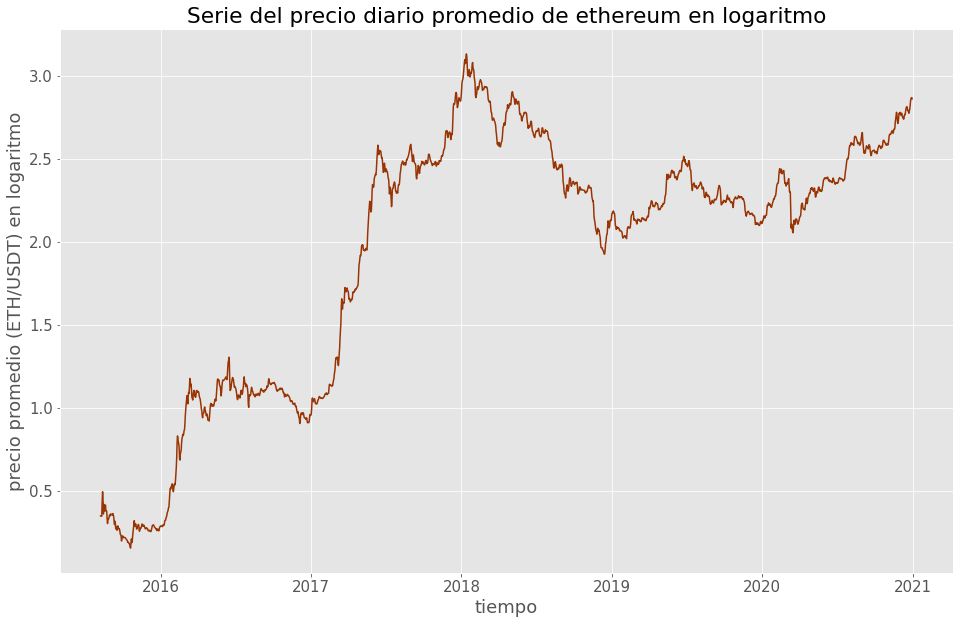

In [37]:
# graficamos el target transformado con logaritmo base 10
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(np.log10(train['y_lag1']+1), color='#993404')
plt.ylabel("precio promedio (ETH/USDT) en logaritmo")
plt.xlabel("tiempo")
plt.title("Serie del precio diario promedio de ethereum en logaritmo");

La transformación logarítmica no elimina la tendencia, pero genera en la cotización un comportamiento más suave y factible para predecir. 

Por último, chequeamos la autocorrelación que presenta nuestra variable a predecir, utilizando dos medidas para esto. Por un lado, la correlación serial común que mide la asociación entre $Y_t$ e $Y_{t-k}$. Por otra parte, utilizamos la autocorrelación parcial, la cual mide la misma asociación pero controlando los demás rezagos de la serie. Los resultados se pueden ver en las siguientes dos figuras:

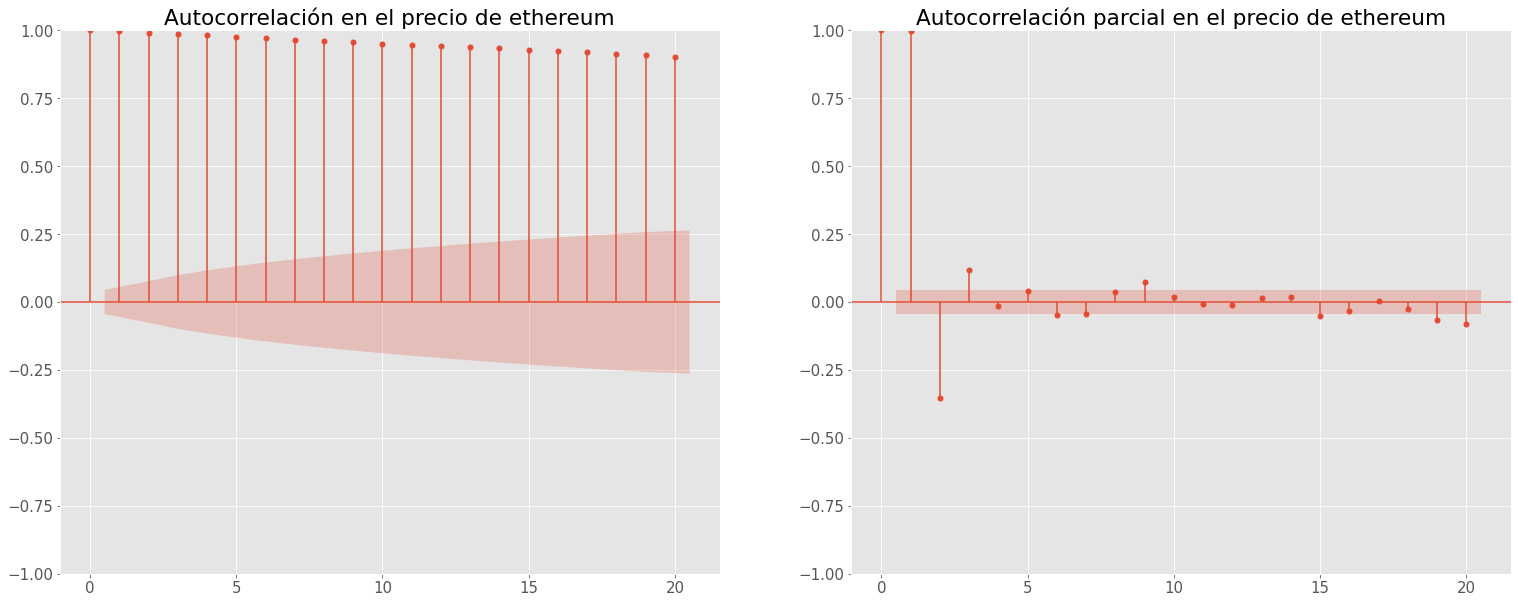

In [7]:
# plot función de autocorrelación
fig, ax = plt.subplots(1,2, figsize=(26,10))
tsaplots.plot_acf(train['y_lag1'], lags= 20, title = 'Autocorrelación en el precio de ethereum', ax=ax[0])
tsaplots.plot_pacf(train['y_lag1'], lags= 20, title = 'Autocorrelación parcial en el precio de ethereum', ax=ax[1])
plt.show()

En las dos figuras de arriba se muestra la autocorrelación de la serie del precio de ethereum, al analizar la autocorrelación común vemos una fuerte correlación serial positiva de los 20 rezagos estudiados, sin embargo, al controlar cada rezago en la estimación (correlación parcial) podemos ver que el efecto del tiempo disminuye, volviendose en la mayoría de los casos no significativa estadísticamente. Siguiendo la última figura y con motivos de simplificar dimensiones incluiremos los dos primeros rezagos como predictores del precio de ethereum.  

#### Causalidad de Wiener-Granger

El test de causalidad de Wiener-Granger (Granger de ahora en más) es un test estadístico utilizado para determinar si una serie temporal puede predecir a otra. La lógica del test es que si una serie temporal $X_1$ "causa" otra $Y$, los modelos de $Y$ en los que se emplean los datos rezagados de $X_1$ e $Y$ deben funcionar mejor que los que utilizan solamente los lags de $Y$. Por supuesto, el hecho de poner "causa" entre comillas `" "` se debe a que los resultados no deben entenderse como un fenómeno causal propiamente dicho, debido a que el test solamente identifica si una variable antecede a otra en una serie temporal. Con dicha prueba no hay forma de demostrar mecanismos de índole causal.  

Dicho esto, en este apartado se pretende ver si existe una relación de causalidad del tipo Granger entre la serie del precio de bitcoin y el de ethereum. Para ello, evaluamos si los 7 rezagos del precio de bitcoin podrían estar asociados significativamente con el target. 

In [10]:
# precio del bitcoin rezagado como predictor del precio futuro de ethereum 
t = grangercausalitytests(df[['open_eth', 'open_btc']], maxlag=7)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=26.9842 , p=0.0000  , df_denom=2495, df_num=1
ssr based chi2 test:   chi2=27.0167 , p=0.0000  , df=1
likelihood ratio test: chi2=26.8716 , p=0.0000  , df=1
parameter F test:         F=26.9842 , p=0.0000  , df_denom=2495, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.1432 , p=0.0000  , df_denom=2492, df_num=2
ssr based chi2 test:   chi2=36.3593 , p=0.0000  , df=2
likelihood ratio test: chi2=36.0971 , p=0.0000  , df=2
parameter F test:         F=18.1432 , p=0.0000  , df_denom=2492, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=17.4294 , p=0.0000  , df_denom=2489, df_num=3
ssr based chi2 test:   chi2=52.4352 , p=0.0000  , df=3
likelihood ratio test: chi2=51.8921 , p=0.0000  , df=3
parameter F test:         F=17.4294 , p=0.0000  , df_denom=2489, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=14.4700 , p=0.

Si bien el test es evaluado sobre el precio de apertura de ethereum y bitcoin, los resultados se mantienen tambien para el caso del precio de cierre:

In [11]:
# precio del bitcoin como predictor del precio futuro de ethereum 
t = grangercausalitytests(df[['close_eth', 'close_btc']], maxlag=7)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=27.0250 , p=0.0000  , df_denom=2495, df_num=1
ssr based chi2 test:   chi2=27.0575 , p=0.0000  , df=1
likelihood ratio test: chi2=26.9120 , p=0.0000  , df=1
parameter F test:         F=27.0250 , p=0.0000  , df_denom=2495, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=18.5148 , p=0.0000  , df_denom=2492, df_num=2
ssr based chi2 test:   chi2=37.1038 , p=0.0000  , df=2
likelihood ratio test: chi2=36.8309 , p=0.0000  , df=2
parameter F test:         F=18.5148 , p=0.0000  , df_denom=2492, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=17.8574 , p=0.0000  , df_denom=2489, df_num=3
ssr based chi2 test:   chi2=53.7229 , p=0.0000  , df=3
likelihood ratio test: chi2=53.1529 , p=0.0000  , df=3
parameter F test:         F=17.8574 , p=0.0000  , df_denom=2489, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=14.8569 , p=0.

Debido a estos resultados, creemos conveniente agregar al dataset los primeros 7 rezagos del precio de bitcoin al dataframe utilizado para la predicción. 

### Variables predictoras o features

Para esta subsección seleccionamos las variables que consideramos más significativas para realizar el análisis. Por un lado, elegimos como primera variable el precio de bitcoin, considerando que es conocida su fuerte correlación con los movimientos del precio de ethereum, lo cual pretendemos observar en esta sección. Por otro lado, a partir de la tabla de estadísticas descriptivas mostrado antes, seleccionamos dos de las primeras variables y dos de las últimas que allí aparecen, es decir, dos de los términos de búsqueda que presentan el mayor promedio de búsquedas diario y dos de los de menor. Repasando la idea de los indicadores de palabras, las mismas se calculan asignando el número 100 al valor máximo de toda la serie, a partir de este se calcula la tasa de búsqueda de los demás días respecto a ese valor máximo, por lo que la interpretación de la proporción de búsqueda se realiza en base a ese valor pico. En primer lugar, graficamos las series de tiempo para ver su comportamiento. Las mismas pueden verse a continuación:

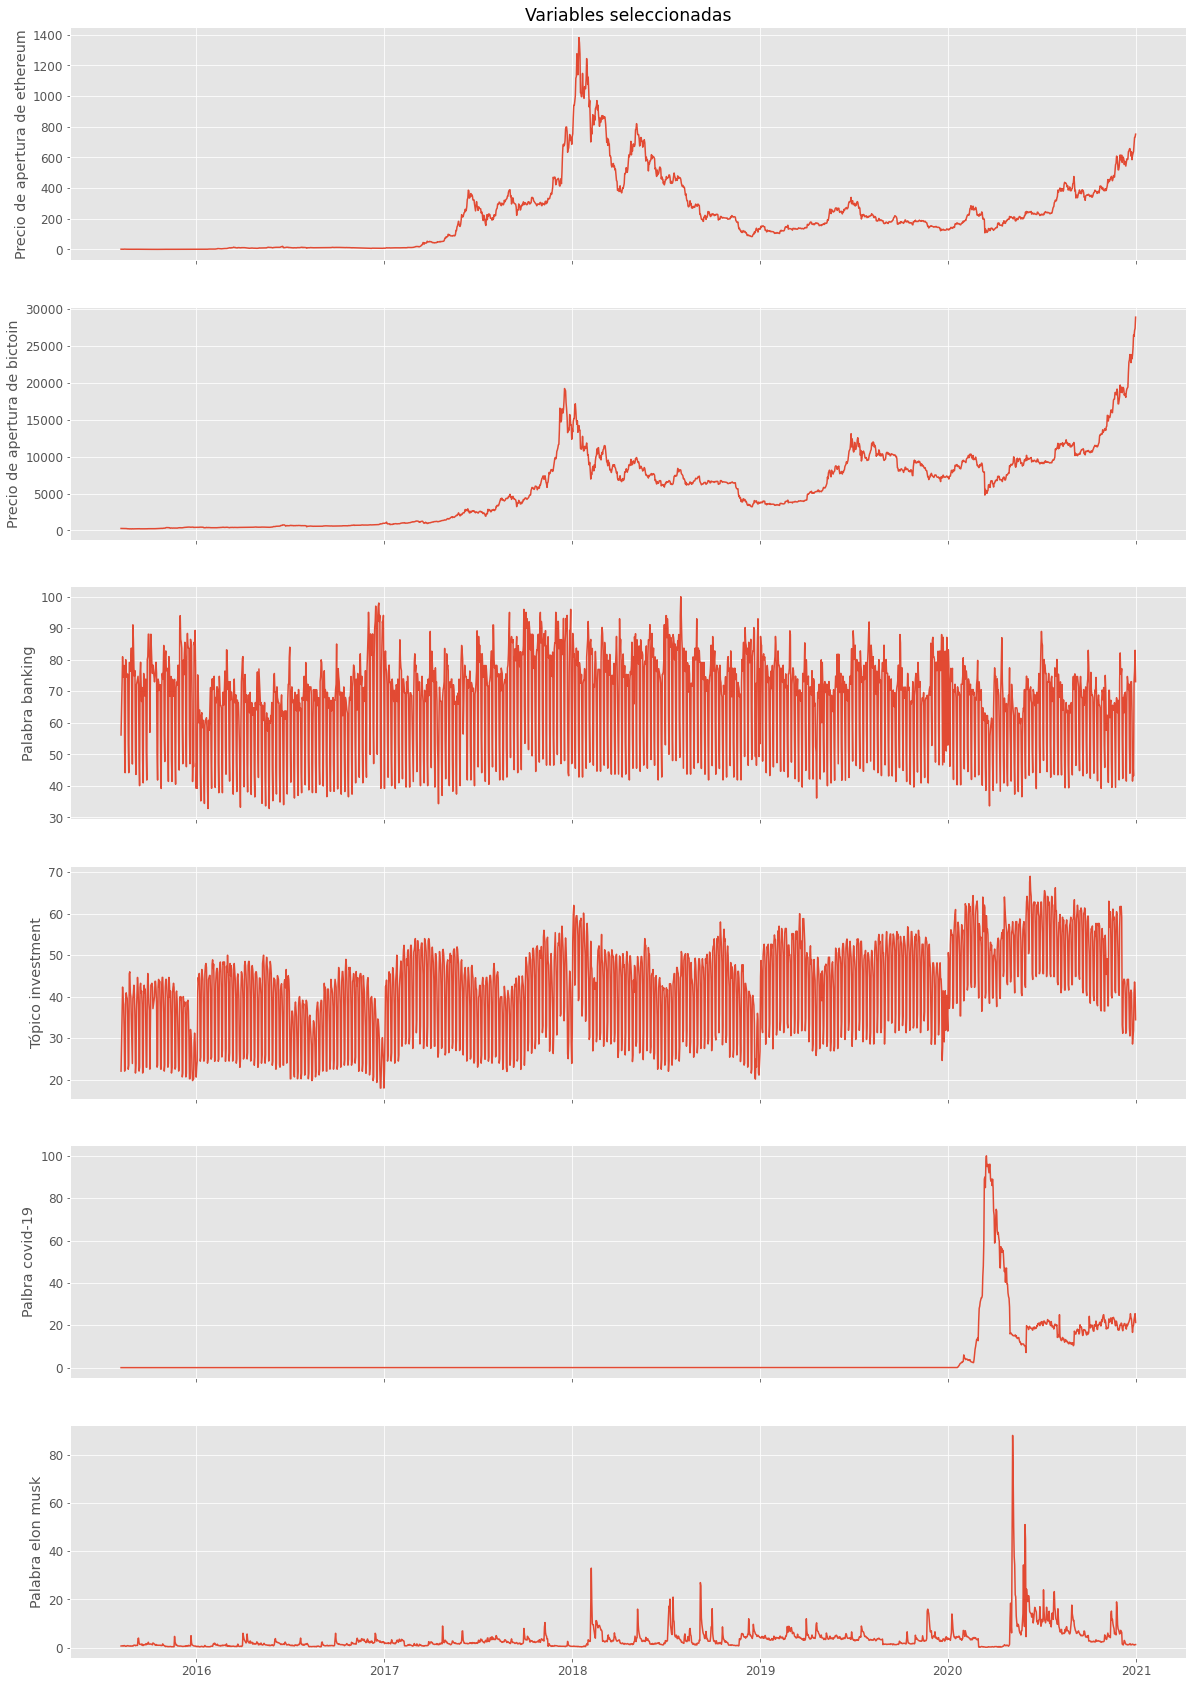

In [31]:
# seteamos nuevamente el tamaño de las labels
mpl.rcParams.update({'font.size': 12}) 

# defino el tamaño del gráfico
fig, ax = plt.subplots(nrows = 6, ncols=1, figsize=(20,30), sharex=True)
varList = ['open_eth', 'open_btc', 'banking_adjusted', 
           'investment_top_adjusted', 'covid19_adjusted', 
           'elon musk_adjusted']
labelList = ['Precio de apertura de ethereum', 'Precio de apertura de bictoin',
             'Palabra banking', 'Tópico investment', 'Palbra covid-19',
             'Palabra elon musk']
ax[0].set_title('Variables seleccionadas')
for i in range(0, 6):
    ax[i].plot(train[varList[i]])    
    ax[i].set_ylabel(labelList[i])

Para el caso de bitcoin y ethereum, tomamos únicamente su valor de apertura diario, aunque optar por el precio de clausura generaría resultados similares. Ambas series parecieran estar muy correlacionadas, debido a que ambos siguen movimientos similares, con un primer pico en 2018 y una tendencia positiva durante el 2020. Por otra parte, variables constantes como *banking* e *investment* no parecen tener cambios abruptos que puedan tener una asociación con las grandes fluctuaciones de ethereum, mientras que la búsqueda de *covid_19* lógicamente comienza a aparecer masivamente recién en 2020, teniendo movimientos que parecen coincidir con momentos de cambios en nuestro target. De igual forma, el término de búsqueda *elon musk* aparece con mayor frecuencia durante el año 2020, aunque también tiene picos de menor nivel durante el 2018.  

Las palabras como *banking* o *investment* presentan características que lo vuelven más estacionarias en comparación con *features* "de momentos" como *covid-19*, que presentan saltos abruptos en períodos cortos de tiempo. De las primeras, podría ser más interesante separar los componentes de tendencia y ciclo para utilizar como *inputs* para la predicción, más que la serie original. Ambas componentes pueden verse en el siguiente gráfico: 

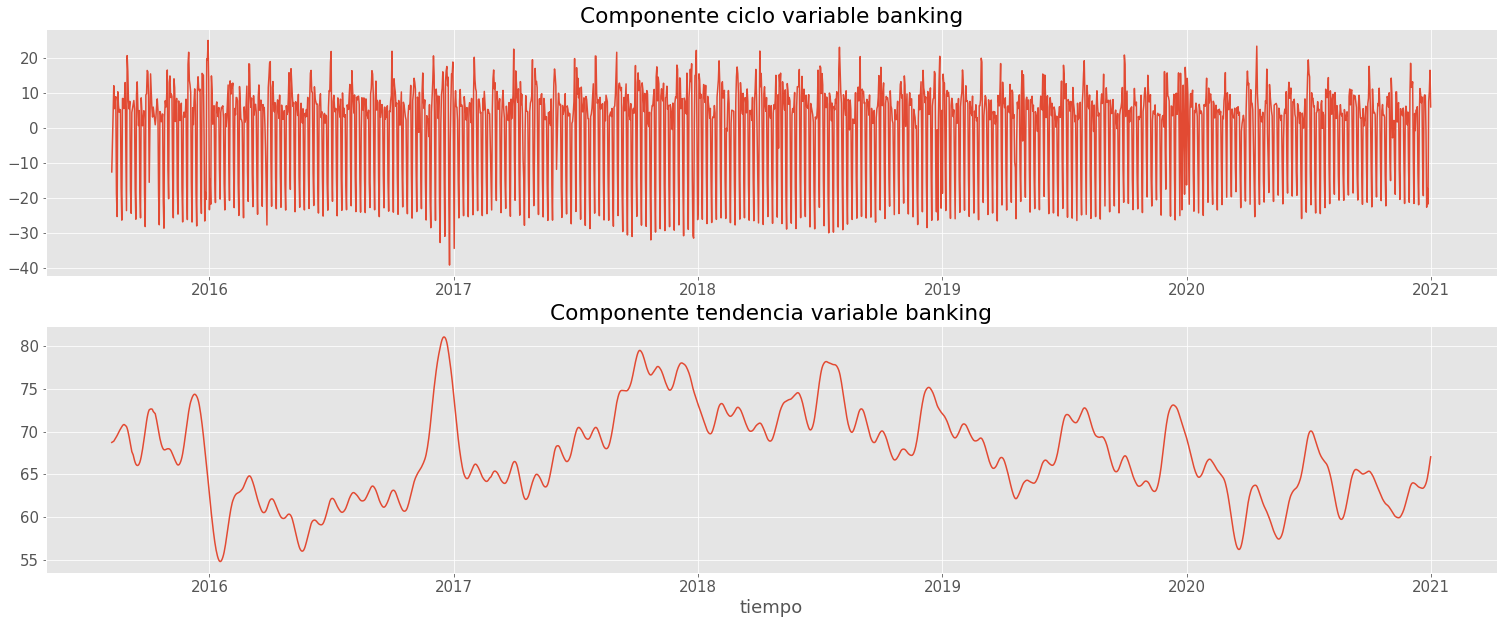

In [30]:
# Aplicando el filtro H-P para separar en tendencia y ciclo.
train_banking_ciclo, train_banking_tend = sm.tsa.filters.hpfilter(train['banking_adjusted'])
# graficando la variacion del precio real con la tendencia.
train_banking_ciclo.index = pd.to_datetime(train_banking_ciclo.index)
train_banking_tend.index = pd.to_datetime(train_banking_tend.index)
fig, ax = plt.subplots(2,1, figsize=(26,10))
ax[0].plot(train_banking_ciclo)
ax[0].set_title('Componente ciclo variable banking')
ax[1].plot(train_banking_tend)
ax[1].set_title('Componente tendencia variable banking')
ax[1].set_xlabel('tiempo');

### Histogramas y densidad

En esta sección dejamos de lado la cuestión del tiempo y miramos cómo se distribuyen alguna de las variables predictoras y el precio de apertura de ethereum (input para nuestro target). Por un lado, seguimos la lógica de la separación entre variables "de momento" y aquellas que mantienen frecuencias positivas de búsqueda todo el período de estudio, por lo que en la siguiente grilla de gráficos se encuentran las variables "estables" *banking* e *investment* junto con los términos de búsqueda *covid-19* y *elon musk*. En el caso de los dos últimos solamente nos quedamos con las frecuencias no nulas, debido a que gran parte de los primeros años no tuvieron búsquedas en google. Por otra parte, graficamos la distribución del precio de apertura de bitcoin y ethereum. 

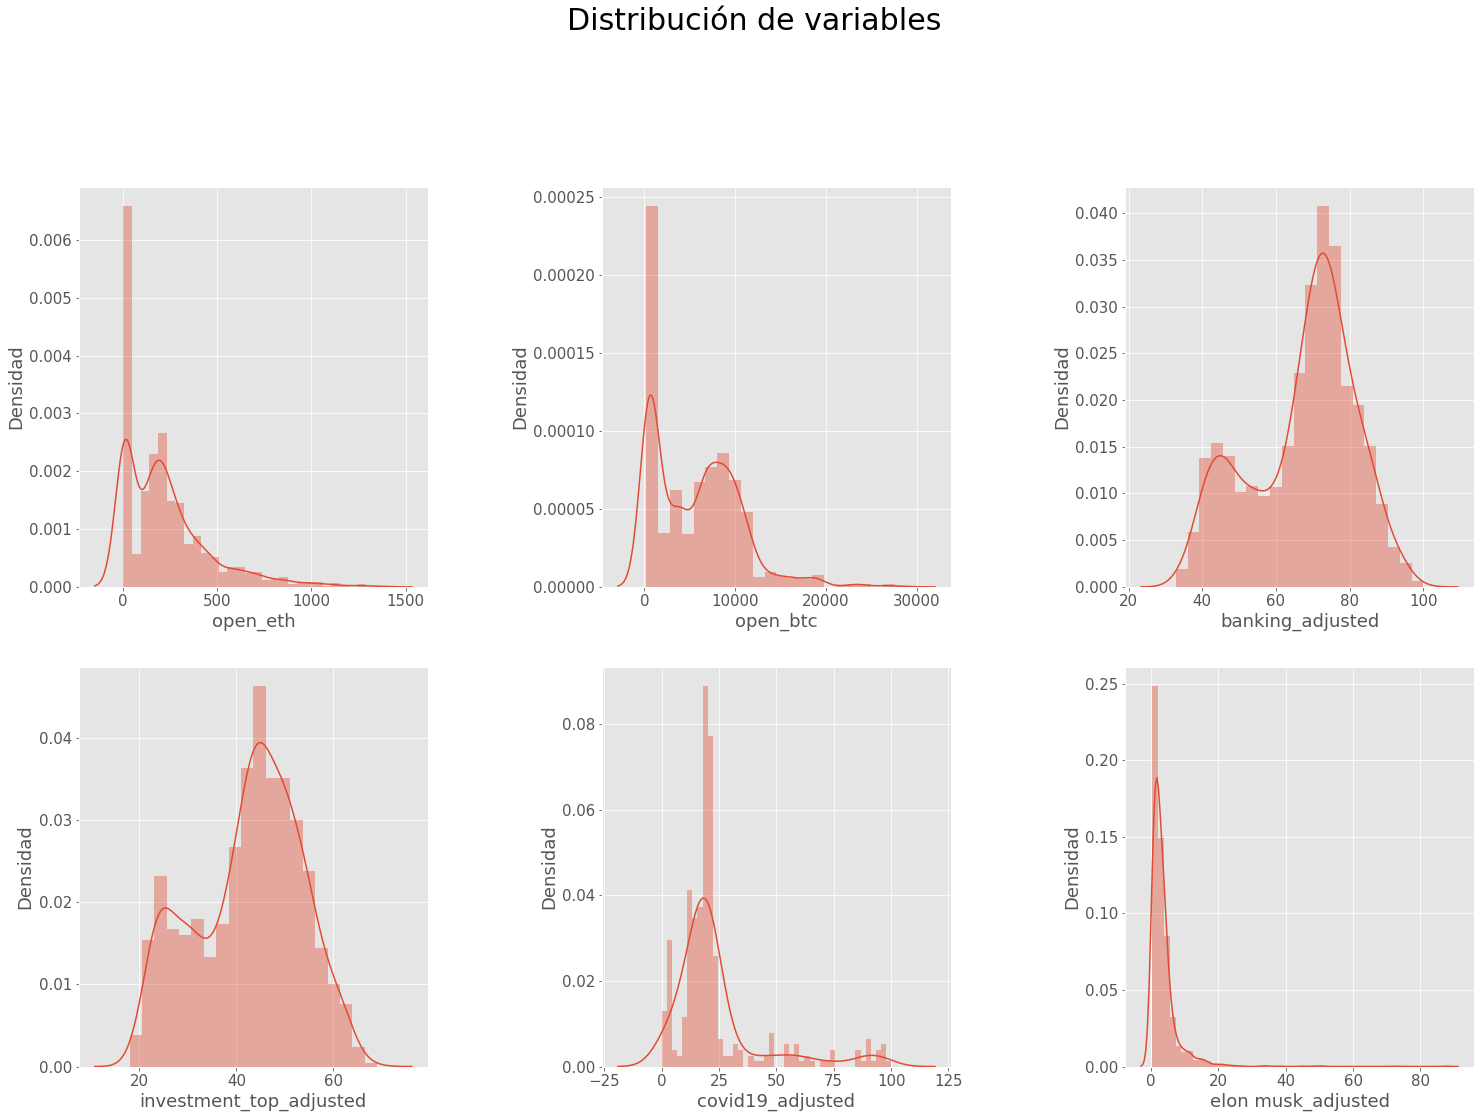

In [6]:
# graficamos hsitogramas con sus densidades
fig = plt.figure(figsize=(25,25))
fig.subplots_adjust(hspace=0.2, wspace=0.5)
fig.suptitle('Distribución de variables', size=30)
varList = ['open_eth', 'open_btc', 'banking_adjusted', 
           'investment_top_adjusted', 'covid19_adjusted', 
           'elon musk_adjusted']
for i in range(0,6):
    ax = fig.add_subplot(3, 3, i+1)
    if (i >= 4):
       sns.distplot(train[varList[i]][train[varList[i]]>0], ax=ax)
       plt.ylabel("Densidad")
    else:
        sns.distplot(train[varList[i]], ax=ax)
        plt.ylabel("Densidad")
plt.show()

Como se puede observar arriba, las series constantes como las cotizaciones presentan distribuciones parecidas, con dos picos en el primer y segundo tramo de la distribución. En el caso de ethereum y bitcoin, las mismas presentan el primer pico en valores positivos cercanos a cero y el segundo alrededor del segundo cuarto de la distribución. Por supuesto, ambas series se encuentran sesgadas a izquierda, de hecho, al llegar aproximadamente a la mediana de la distribución de las cotizaciones acumularíamos casi a todas las observaciones. 
En el caso de las variables "de momento" y las más constantes podría radicar en cómo se acumulan sus frecuencias. Las observaciones en palabras como *banking* o *investment* se acumulan en valores altos de las frecuencias, reflejando lo que vimos antes: sus frecuencias se mantienen relativamente constantes en todo el período. En contaste, *covid-19* y *elon musk* tienen muchas observaciones en frecuencias bajas, y pocas en valores altos del indicador de búsquedas, lo que refleja el comportamiento opuesto, es decir, las búsquedas positivas son pocas en relación al rango de tiempo bajo análisis pero en períodos cortos de tiempo se acumulan considerablemente. 

Hasta ahora analizamos el comportamiento individual de las variables, intentando identificar características particulares de ciertos grupos de series de las variables predictoras como estudiar el comportamiento de nuestro output. En la siguiente sección ampliaremos el análisis a la búsqueda de patrones entre dos variables, conocido como análisis bivariado. 